Image Recognition
===

This notebook will create a convolutional neural network to classify images in either the mnist or cifar-10 datasets.

In [1]:
# Tensorflow and numpy to create the neural network
import tensorflow as tf
import numpy as np

# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt

# OS to load files and save checkpoints
import os

%matplotlib inline

Loading the data
---

This code will load the dataset that you'll use to train and test the model.

The code provided will load the mnist or cifar data from files, you'll need to add the code that processes it into a format your neural network can use.

MNIST
---

Run this cell to load mnist data.

In [2]:
# Load MNIST data from tf examples
import tensorflow as tf
from tensorflow.python.keras.datasets import fashion_mnist
image_height = 28
image_width = 28

color_channels = 1

#model_name = mnist

'''mnist = tf.contrib.learn.datasets.load_dataset("mnist")

train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)

eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

category_names = list(map(str, range(10)))'''
model_name = "mnist_fashion"
((train_data, train_labels), (eval_data, eval_labels)) = fashion_mnist.load_data()

# TODO: Process mnist data 
print(train_data.shape)

train_data = np.reshape(train_data, (-1, image_height, image_width, color_channels)) 

print(train_data.shape)

eval_data = np.reshape(eval_data, (-1, image_height, image_width, color_channels))

train_data = train_data.astype("float32")/255.0
eval_data = eval_data.astype("float32")/255.0

category_names = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

(60000, 28, 28)
(60000, 28, 28, 1)


CIFAR-10
---

Run this cell to load cifar-10 data

In [3]:
# Load cifar data from file
'''
image_height = 32
image_width = 32

color_channels = 3

model_name = "cifar"

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

cifar_path = './cifar-10-data/'

train_data = np.array([])
train_labels = np.array([])

# Load all the data batches.
for i in range(1,6):
    data_batch = unpickle(cifar_path + 'data_batch_' + str(i))
    train_data = np.append(train_data, data_batch[b'data'])
    train_labels = np.append(train_labels, data_batch[b'labels'])


# Load the eval batch.
eval_batch = unpickle(cifar_path + 'test_batch')

# Load the eng
eval_data = eval_batch[b'data']
eval_labels = eval_batch[b'labels'] 

# Load the english category names.
category_names_bytes = unpickle(cifar_path + 'batches.meta')[b'label_names']
category_names = list(map(lambda x: x.decode("utf-8"), category_names_bytes))

# TODO: Process Cifar data

def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0
    
    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))
    
    # The incorrect image
    
    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])
    print(transposed_data [1544].shape)
    plt.imshow (transposed_data [1545])
    
    return transposed_data


train_data = process_data(train_data)

eval_data = process_data(eval_data)
'''

'\nimage_height = 32\nimage_width = 32\n\ncolor_channels = 3\n\nmodel_name = "cifar"\n\ndef unpickle(file):\n    import pickle\n    with open(file, \'rb\') as fo:\n        dict = pickle.load(fo, encoding=\'bytes\')\n    return dict\n\ncifar_path = \'./cifar-10-data/\'\n\ntrain_data = np.array([])\ntrain_labels = np.array([])\n\n# Load all the data batches.\nfor i in range(1,6):\n    data_batch = unpickle(cifar_path + \'data_batch_\' + str(i))\n    train_data = np.append(train_data, data_batch[b\'data\'])\n    train_labels = np.append(train_labels, data_batch[b\'labels\'])\n\n\n# Load the eval batch.\neval_batch = unpickle(cifar_path + \'test_batch\')\n\n# Load the eng\neval_data = eval_batch[b\'data\']\neval_labels = eval_batch[b\'labels\'] \n\n# Load the english category names.\ncategory_names_bytes = unpickle(cifar_path + \'batches.meta\')[b\'label_names\']\ncategory_names = list(map(lambda x: x.decode("utf-8"), category_names_bytes))\n\n# TODO: Process Cifar data\n\ndef process_data

Once the data is processed, you have a few variables for the data itself and info about its shape:

### Model Info

- **image_height, image_width** - The height and width of the processed images
- **color_channels** - the number of color channels in the image. This will be either 1 for grayscale or 3 for rgb.
- **model_name** - either "cifar" or "mnist" - if you need to handle anything differently based on the model, check this variable.
- **category_names** - strings for each category name (used to print out labels when testing results)

### Training Data

- **train_data** - the training data images
- **train_labels** - the labels for the training data - the "answer key"

### Evaluation Data

- **eval_data** - Image data for evaluation. A different set of images to test your network's effectiveness.
- **eval_labels** - the answer key for evaluation data.

Building the Neural Network Model
--

Next, you'll build a neural network with the following architecture:

- An input placeholder that takes one or more images.
- 1st Convolutional layer with 32 filters and a kernel size of 5x5 and same padding
- 1st Pooling layer with a 2x2 pool size and stride of 2
- 2nd Convolutional layer with 64 filters and a kernel size of 5x5 and same padding
- 2nd Pooling layer with a 2x2 pool size and stride of 2
- Flatten the pooling layer
- A fully connected layer with 1024 units
- A dropout layer with a rate of 0.4
- An output layer with an output size equal to the number of labels.

In [4]:
# TODO: The neural network
class ConvNet:
    
    def __init__(self, image_height, image_width, channels, num_classes):
        
        self.input_layer = tf.placeholder(dtype=tf.float32, shape=[None, image_height, image_width, channels], name="inputs")
        print(self.input_layer.shape)
        
        conv_layer_1 = tf.layers.conv2d(self.input_layer, filters=32, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
        print(conv_layer_1.shape)
        
        pooling_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
        print(pooling_layer_1.shape)
        
        conv_layer_2 = tf.layers.conv2d(pooling_layer_1, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
        print(conv_layer_2.shape)
        
        pooling_layer_2 = tf.layers.max_pooling2d(conv_layer_2, pool_size=[2, 2], strides=2)
        print(pooling_layer_2.shape)
        
        flattened_pooling = tf.layers.flatten(pooling_layer_2)
        dense_layer = tf.layers.dense(flattened_pooling, 1024, activation=tf.nn.relu)
        print(dense_layer.shape)
        dropout = tf.layers.dropout(dense_layer, rate=0.4, training=True)
        outputs = tf.layers.dense(dropout, num_classes)
        print(outputs.shape)
        
        self.choice = tf.argmax(outputs, axis=1)
        self.probability = tf.nn.softmax(outputs)
        
        self.labels = tf.placeholder(dtype=tf.float32, name="labels")
        self.accuracy, self.accuracy_op = tf.metrics.accuracy(self.labels, self.choice)
        
        one_hot_labels = tf.one_hot(indices=tf.cast(self.labels, dtype=tf.int32), depth=num_classes)     
        self.loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels, logits=outputs)
        
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-1)
        self.train_operation = optimizer.minimize(loss=self.loss, global_step=tf.train.get_global_step())

The Training Process
---

The cells below will set up and run the training process.

- Set up initial values for batch size, training length.
- Process data into batched datasets to feed into the network.
- Run through batches of training data, update weights, save checkpoints.

In [5]:
# TODO: initialize variables
training_steps = 10000
batch_size = 16
path = "./" + model_name + "-cnn/" 
load_checkpoint = False 
performance_graph = np.array([])

In [6]:
# TODO: implement the training loop
tf.reset_default_graph() 
dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels)) 
dataset = dataset.shuffle(buffer_size=train_labels.shape[0]) 
dataset = dataset.batch(batch_size) 
dataset = dataset.repeat() 
dataset_iterator = dataset.make_initializable_iterator()
next_element = dataset_iterator.get_next()
cnn = ConvNet(image_height,image_width,color_channels,10) 
saver = tf.train.Saver(max_to_keep=2) 
if not os.path.exists(path): 
    os.makedirs(path) 
with tf.Session() as sess:
    
    if load_checkpoint:
        checkpoint = tf.train.get_checkpoint_state(path)
        saver.restore(sess, checkpoint.model_checkpoint_path)
    else:
        sess.run(tf.global_variables_initializer())
    
    sess.run(tf.local_variables_initializer())
    sess.run(dataset_iterator.initializer)
    for step in range(training_steps):
        current_batch = sess.run(next_element)
        
        batch_inputs = current_batch[0]
        batch_labels = current_batch[1]
        
        sess.run((cnn.train_operation, cnn.accuracy_op), feed_dict={ cnn.input_layer:batch_inputs, cnn.labels:batch_labels})
        if step % 10 == 0:
            performance_graph = np.append(performance_graph, sess.run(cnn.accuracy))
        if step % 1000 == 0 and step > 0: 
            current_acc = sess.run(cnn.accuracy) 
            print("Accuracy at step " + str(step) + ": " + str(current_acc))
            print("Saving checkpoint")
            saver.save(sess, path + model_name, step)
        
    print("Saving final checkpoint for training session.")
    saver.save(sess, path + model_name, step)
                

(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)
(?, 14, 14, 64)
(?, 7, 7, 64)
(?, 1024)
(?, 10)
Accuracy at step 1000: 0.7574925
Saving checkpoint
Accuracy at step 2000: 0.80094326
Saving checkpoint
Accuracy at step 3000: 0.8220385
Saving checkpoint
Accuracy at step 4000: 0.8352912
Saving checkpoint
Accuracy at step 5000: 0.8451435
Saving checkpoint
Accuracy at step 6000: 0.8524621
Saving checkpoint
Accuracy at step 7000: 0.8583238
Saving checkpoint
Accuracy at step 8000: 0.8638295
Saving checkpoint
Accuracy at step 9000: 0.86856323
Saving checkpoint
Saving final checkpoint for training session.


Evaluating Performance
---

These cells will evaluate the performance of your network!

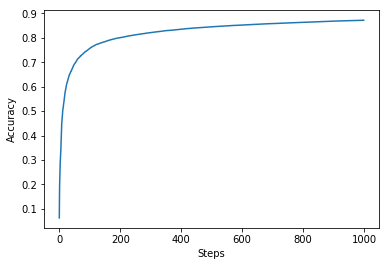

In [7]:
# TODO: Display graph of performance over time 
plt.figure().set_facecolor('white')
plt.xlabel("Steps")
plt.ylabel("Accuracy")
plt.plot(performance_graph)

In [8]:
# TODO: Run through the evaluation data set, check accuracy of model
with tf.Session() as sess:
    checkpoint = tf.train.get_checkpoint_state(path)
    saver.restore(sess,checkpoint.model_checkpoint_path)
    
    sess.run(tf.local_variables_initializer())
    
    for image, label in zip(eval_data, eval_labels):
        sess.run(cnn.accuracy_op, feed_dict={cnn.input_layer:[image], cnn.labels:label})
    
    print(sess.run(cnn.accuracy))

INFO:tensorflow:Restoring parameters from ./mnist_fashion-cnn/mnist_fashion-9999
0.8953


INFO:tensorflow:Restoring parameters from ./mnist_fashion-cnn/mnist_fashion-9999


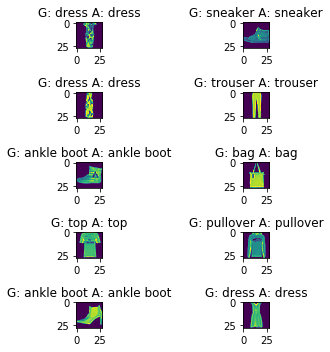

In [9]:
# TODO: Get a random set of images and make guesses for each
with tf.Session() as sess:
    checkpoint = tf.train.get_checkpoint_state(path)
    saver.restore(sess,checkpoint.model_checkpoint_path)
    
    indexes = np.random.choice(len(eval_data), 10, replace=False)
    
    rows = 5
    cols = 2
    
    fig, axes = plt.subplots(rows, cols, figsize=(5,5))
    fig.patch.set_facecolor('white')
    image_count = 0
    
    for idx in indexes:
        image_count += 1
        sub = plt.subplot(rows,cols,image_count)
        img = eval_data[idx]
        if model_name == "mnist" or model_name == "mnist_fashion":
            img = img.reshape(28, 28)
        plt.imshow(img)
        guess = sess.run(cnn.choice, feed_dict={cnn.input_layer:[eval_data[idx]]})
        if model_name == "mnist":
            guess_name = str(guess[0])
            actual_name = str(eval_labels[idx])
        elif model_name == "mnist_fashion":
            guess_name = category_names[guess[0]]
            actual_name = category_names[eval_labels[idx]]
        else:
            guess_name = category_names[guess[0]]
            actual_name = category_names[eval_labels[idx]]
        sub.set_title("G: " + guess_name + " A: " + actual_name)
    plt.tight_layout()

In [10]:
print("Hello World!")

Hello World!
